In [15]:
import numpy as np
import cv2
import os
import uuid 
import matplotlib.pyplot as plt

In [16]:
image="./S5001L00.jpg"

In [17]:
def plot_image(image,title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [18]:
def processing(img_path,r):
  image=cv2.imread(img_path)
  plot_image(image,"original image")
  image=cv2.resize(image,(640,480),interpolation=cv2.INTER_LINEAR)
  plot_image(image,"resized image")
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  plot_image(image,"gray image")
  gray=cv2.medianBlur(image,5)
  plot_image(gray,"median blur image")
  ret, _ = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, 1, 50, param1=ret, param2=30, minRadius=20,
                              maxRadius=100)
  
  print(circles.shape)

  if circles is not None:
    circles = circles[0, :, :]
    circles = np.int16(np.around(circles))
    roi_images = []  # To store ROI data for each circle

    for idx, i in enumerate(circles):
            # Calculate the coordinates for the region of interest (ROI)
        y1, y2 = i[1] - i[2] - r, i[1] + i[2] + r
        x1, x2 = i[0] - i[2] - r, i[0] + i[2] + r
        
        # Ensure indices are within bounds of the image
        if y1 < 0 or y2 > image.shape[0] or x1 < 0 or x2 > image.shape[1]:
            print(f"Circle {idx} is out of image bounds, skipping.")
            continue
        
        # Draw the circle on the image
        center = (i[0], i[1])  # (x, y) center of the circle
        radius = i[2]  # radius of the circle
        color = (0, 255, 0)  # Green in BGR
        thickness = 2
        cv2.circle(image, center, radius, color, thickness)
        
        # Optional: Show each ROI separately
        roi_image = image[y1:y2, x1:x2]
        plt.imshow(cv2.cvtColor(roi_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Region of Interest (ROI) for Circle {idx}")
        plt.show()

    # Display the original image with all drawn circles
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image with Circles Drawn")
        plt.axis("off")
        plt.show()
    else:
        print("No circles detected.")

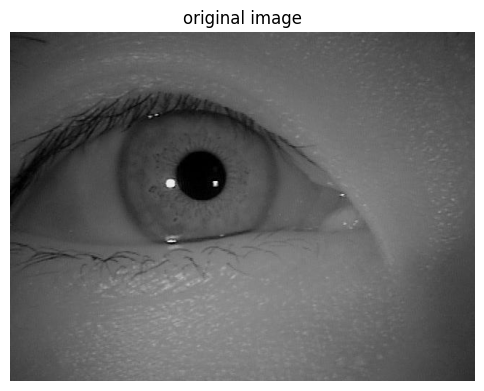

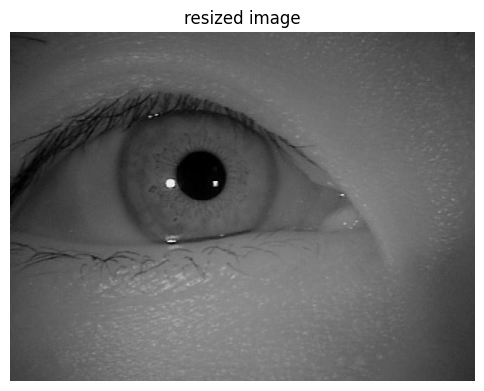

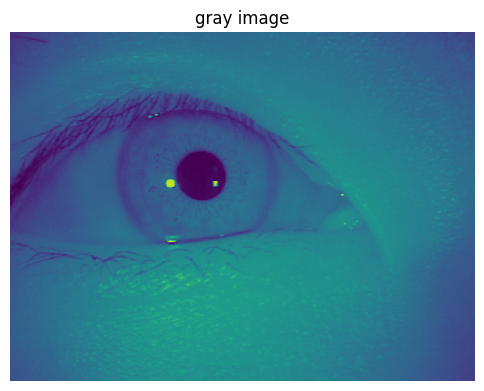

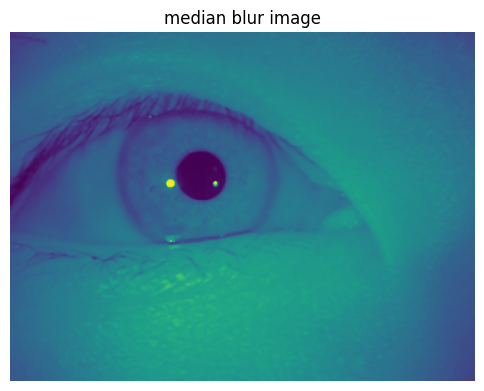

(1, 8, 3)


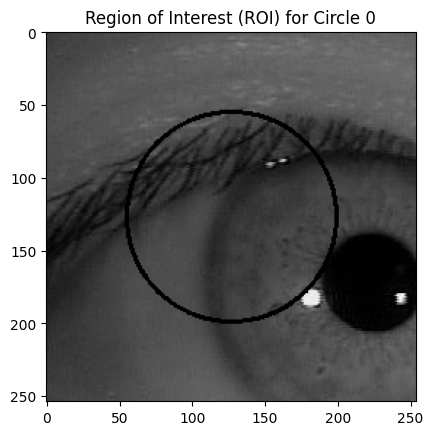

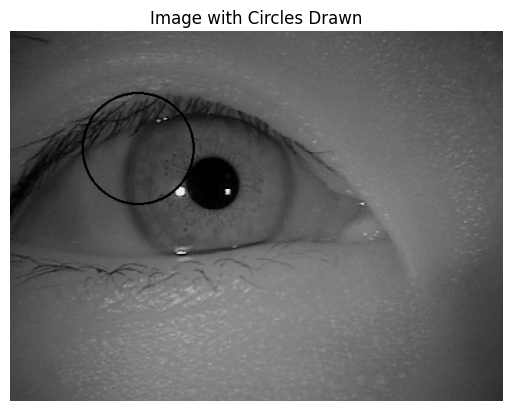

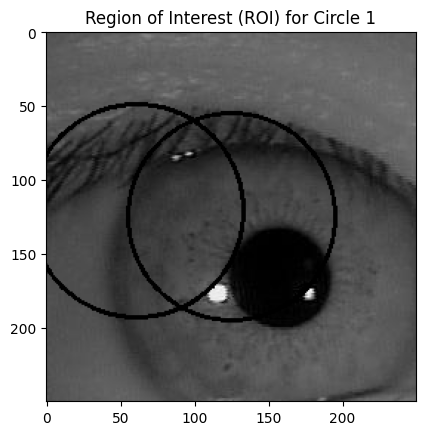

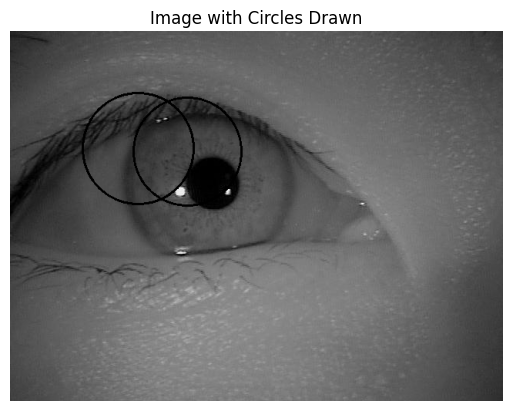

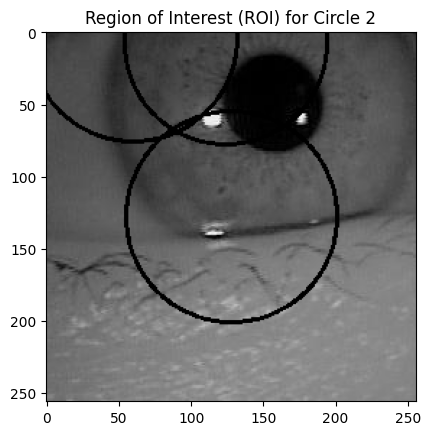

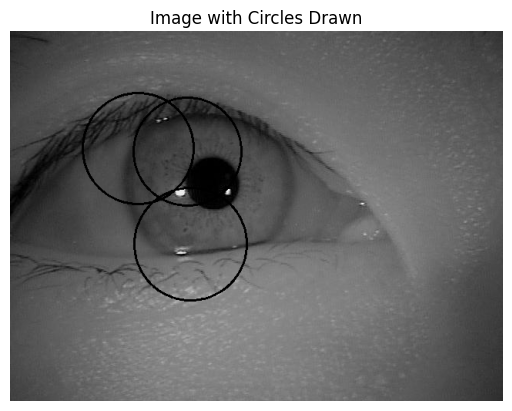

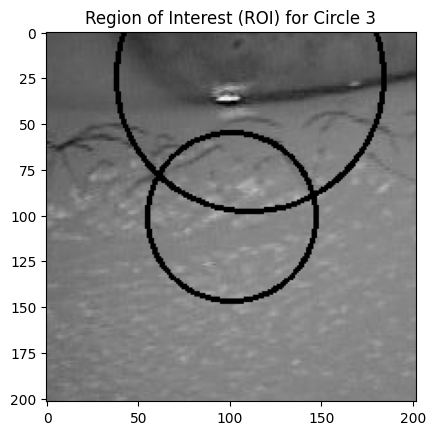

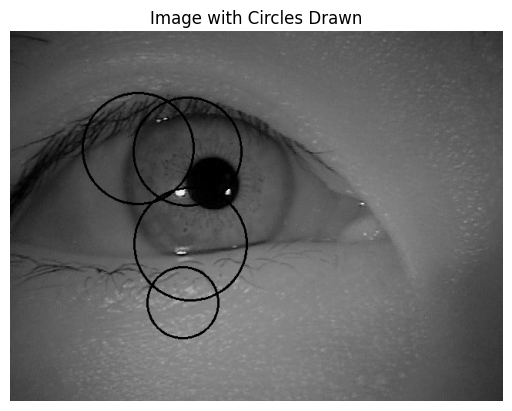

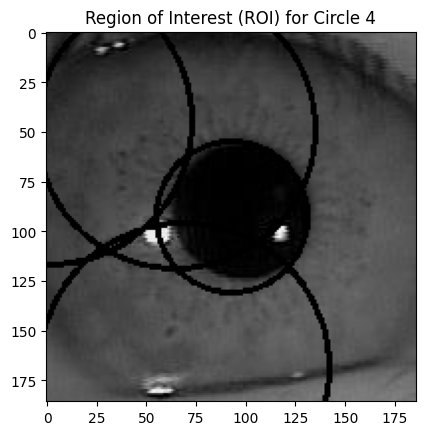

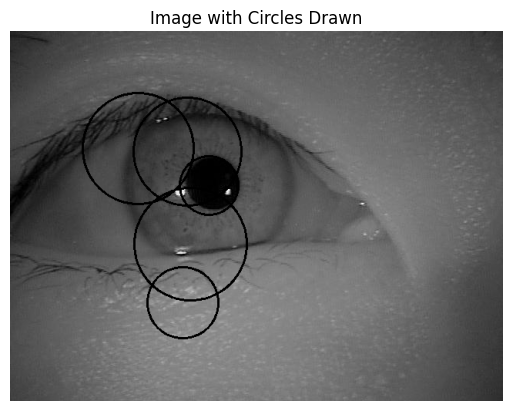

Circle 5 is out of image bounds, skipping.


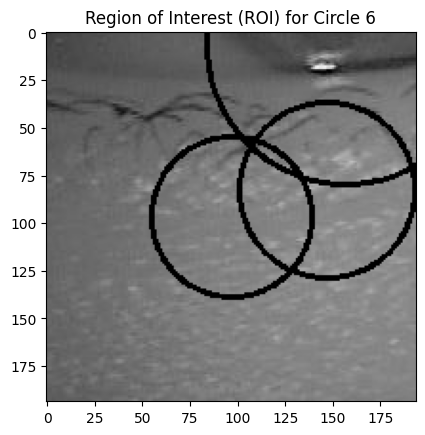

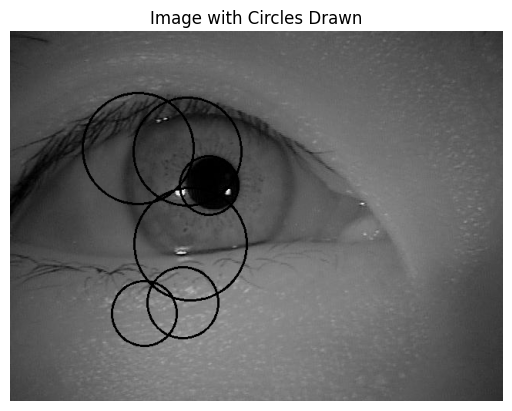

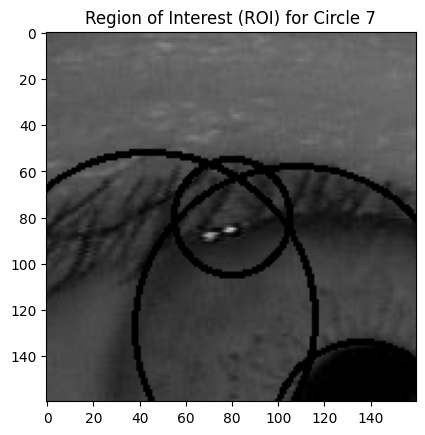

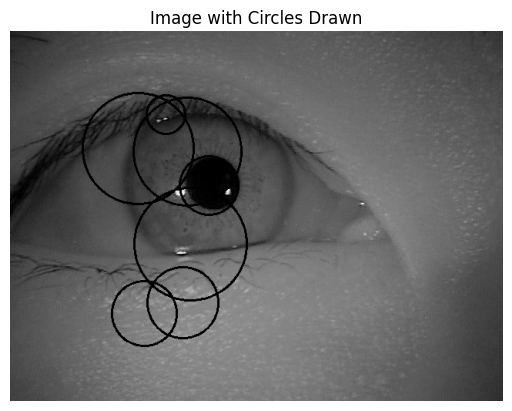

No circles detected.


In [19]:
processed_image=processing(image,55)

In [20]:
def reflection_removal(processed_image):
  ret,mask=cv2.threshold(processed_image,150,255,cv2.THRESH_BINARY)
  kernel=np.ones((5,5),np.uint8)
  dilation=cv2.dilate(mask,kernel,iterations=1)
  dst=cv2.inpaint(processed_image,dilation,5,cv2.INPAINT_TELEA)
  return dst

In [21]:
print(processed_image)
result = reflection_removal(processed_image)
plot_image(result, "Reflection Removed")

None


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\morph.dispatch.cpp:1022: error: (-215:Assertion failed) !src.empty() in function 'cv::dilate'
